let's transition from regression to classification with **Topic 9: Logistic Regression**. Despite its name, Logistic Regression is a fundamental algorithm for **classification tasks**, not for predicting continuous values like linear regression.

---

**1. Introduction: From Regression to Classification**

  * **Regression:** Predicts a continuous numerical output (e.g., price, temperature). Linear regression was an example.
  * **Classification:** Predicts a discrete class label (e.g., "spam" or "not spam", "cat" or "dog", "disease" or "no disease").
  * **Why not use Linear Regression for Classification?**
    1.  **Unbounded Output:** Linear regression can output values that are less than 0 or greater than 1. If we're trying to predict probabilities of belonging to a class (which should be between 0 and 1), this is problematic.
    2.  **Poor Interpretation:** Trying to threshold the output of linear regression to make class decisions isn't robust and doesn't directly model class probabilities.

Logistic Regression is designed to address these issues for classification problems.

---

**2. What is Logistic Regression?**

  * **Core Idea:** Logistic Regression models the probability that an instance belongs to a particular class. For binary classification (two classes, e.g., 0 and 1), it estimates $P(y=1 | X)$, the probability of the instance belonging to class 1 given its features $X$.
  * It does this by taking a linear combination of the input features and then passing this result through a special function called the **sigmoid (or logistic) function**.

---

**3. The Sigmoid (Logistic) Function: Squashing the Output**

  * **Purpose:** The sigmoid function takes any real-valued number $z$ (which is the output of a linear equation: $z = b\_0 + b\_1x\_1 + \\dots + b\_px\_p$) and "squashes" it into a value between 0 and 1. This output can then be interpreted as a probability.

  * **Formula:**
    $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

  * **Graph and Properties:**

      * It produces an "S-shaped" curve.
      * As $z \\rightarrow \\infty$, $\\sigma(z) \\rightarrow 1$.
      * As $z \\rightarrow -\\infty$, $\\sigma(z) \\rightarrow 0$.
      * If $z = 0$, $\\sigma(z) = 0.5$.

  * **Logistic Regression Model Equation:**
    The estimated probability $\\hat{p}$ that an instance belongs to class 1 is given by:
    $$\hat{p} = P(y=1 | X) = \sigma(z) = \sigma(b_0 + b_1x_1 + \dots + b_px_p) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + \dots + b_px_p)}}$$
    Where $b\_0, b\_1, \\dots, b\_p$ are the model's coefficients (parameters) that are learned from the data.

---

**4. Making Predictions & The Decision Boundary**

  * **From Probability to Class Label:** Once we have the estimated probability $\\hat{p}$, we need a rule to assign a class label:
      * A common threshold is 0.5.
      * If $\\hat{p} \\ge 0.5$, predict class 1.
      * If $\\hat{p} \< 0.5$, predict class 0.
  * **Decision Boundary:**
      * The decision to predict class 1 or 0 changes when $\\hat{p} = 0.5$. This occurs when the input to the sigmoid function $z=0$.
      * So, the decision boundary is defined by the equation:
        $$b_0 + b_1x_1 + b_2x_2 + \dots + b_px_p = 0$$
      * **Crucially, this decision boundary is linear in the feature space.**
          * For 2 features ($x\_1, x\_2$): $b\_0 + b\_1x\_1 + b\_2x\_2 = 0$ is the equation of a straight line.
          * For 3 features: It's a plane.
          * For \>3 features: It's a hyperplane.
      * Logistic Regression finds the "best" linear boundary to separate the classes.

---

**5. Mathematical Intuition: The Log-Odds (Logit) Transformation**

Logistic Regression is fundamentally a linear model, but it models the *log-odds* of the probability linearly.

  * **Probability ($p$):** $P(y=1|X)$
  * **Odds:** The ratio of the probability of the event occurring to the probability of it not occurring.
    $$\text{odds} = \frac{p}{1-p}$$
    Odds range from 0 to $\\infty$.
  * **Log-Odds (or Logit):** The natural logarithm of the odds.
    $$\text{logit}(p) = \ln\left(\frac{p}{1-p}\right)$$
    Log-odds range from $-\\infty$ to $+\\infty$.
  * **The Logistic Regression Model can be written as:**
    $$\ln\left(\frac{p}{1-p}\right) = b_0 + b_1x_1 + \dots + b_px_p$$
    This shows that there's a linear relationship between the features and the log-odds of the event. If you solve this equation for $p$, you get back the sigmoid function expression for $p$.
    The coefficients $b\_j$ can be interpreted in terms of their effect on the log-odds. For example, a one-unit increase in $x\_j$ changes the log-odds by $b\_j$, or changes the odds by a factor of $e^{b\_j}$, holding other features constant.

---

**6. Cost Function for Logistic Regression (Log Loss / Binary Cross-Entropy)**

  * **Why not use Mean Squared Error (MSE)?** If we were to use MSE with the sigmoid function to predict probabilities, the resulting cost function $J(b) = \\sum (\\text{actual\_binary\_y} - \\sigma(Xb))^2$ would be **non-convex**. This means it could have many local minima, making it difficult for optimization algorithms like gradient descent to find the global minimum.
  * **Log Loss (also known as Binary Cross-Entropy):**
      * This cost function is designed for probabilistic models and is convex for logistic regression, ensuring that gradient descent can find the global minimum.
      * **Intuition:** It penalizes the model heavily if it makes confident wrong predictions.
          * If the true class $y=1$, we want $\\hat{p}$ (predicted probability for class 1) to be close to 1. The cost for this instance is $-\\log(\\hat{p})$. As $\\hat{p} \\rightarrow 0$ (confident wrong prediction), $-\\log(\\hat{p}) \\rightarrow \\infty$.
          * If the true class $y=0$, we want $\\hat{p}$ to be close to 0 (so $1-\\hat{p}$ is close to 1). The cost for this instance is $-\\log(1-\\hat{p})$. As $\\hat{p} \\rightarrow 1$ (confident wrong prediction), $-\\log(1-\\hat{p}) \\rightarrow \\infty$.
      * **Formula for a single instance:**
        $$Cost(y, \hat{p}) = -[y \log(\hat{p}) + (1-y) \log(1-\hat{p})]$$
      * **Overall Cost Function $J(b)$ (averaged over all $n$ training instances):**
        $$J(b) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{p}_i) + (1-y_i) \log(1-\hat{p}_i)]$$
        where $\\hat{p}\_i = \\sigma(X\_i b)$.

---

**7. Optimization & Regularization**

  * The model coefficients $b$ are found by minimizing this Log Loss cost function $J(b)$.
  * This is typically done using iterative optimization algorithms like:
      * **Gradient Descent** (or variants).
      * More advanced methods like **L-BFGS**, **SAG**, **SAGA**, **Newton-CG** (Scikit-learn's `LogisticRegression` offers these as solver options).
  * **Regularization:** Just like in linear regression, regularization (L1 or L2) is commonly applied to logistic regression to prevent overfitting, especially when dealing with many features or multicollinearity.
      * In Scikit-learn's `LogisticRegression`, the hyperparameter `C` controls the **inverse of regularization strength**.
          * Smaller `C` values specify stronger regularization.
          * Larger `C` values specify weaker regularization.
      * The `penalty` parameter specifies 'l1', 'l2', 'elasticnet', or None.

---

**8. Application to Binary and Multi-class Classification**

  * **Binary Classification:** The above description directly applies (e.g., spam vs. not spam).
  * **Multi-class Classification (more than two classes):**
    Logistic Regression can be extended to handle multiple classes using strategies like:
    1.  **One-vs-Rest (OvR) / One-vs-All (OvA):**
          * If there are $K$ classes, $K$ separate binary logistic regression classifiers are trained.
          * Classifier $k$ is trained to distinguish class $k$ from all other $K-1$ classes.
          * To make a prediction for a new instance, all $K$ classifiers produce a probability. The class whose classifier outputs the highest probability is chosen.
          * This is often the default strategy in Scikit-learn (`multi_class='ovr'`).
    2.  **Multinomial Logistic Regression (Softmax Regression):**
          * This is a direct generalization of logistic regression to multiple classes.
          * Instead of the sigmoid function, it uses the **softmax function**, which takes a vector of $K$ scores (one for each class) and outputs a vector of $K$ probabilities that sum to 1.
          * Model: $P(y=k|X) = \\frac{e^{z\_k}}{\\sum\_{j=1}^{K} e^{z\_j}}$, where $z\_k = b\_{k0} + b\_{k1}x\_1 + \\dots$ (each class $k$ has its own set of coefficients).
          * Scikit-learn's `LogisticRegression` can use this if `multi_class='multinomial'`, often paired with solvers like 'lbfgs', 'newton-cg', 'sag', 'saga'.

---


**9. Implementation with Scikit-learn**

Let's use the **Breast Cancer Wisconsin (Diagnostic) dataset** from Scikit-learn, which is a binary classification problem (malignant vs. benign).


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load Data ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target # y=0 for malignant, y=1 for benign
feature_names = cancer.feature_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Breast Cancer Dataset Loaded.")
print(f"Features shape: {X_df.shape}")
print(f"Target distribution: {np.bincount(y)}") # Show class balance
print(f"Target names: {cancer.target_names}") # ['malignant' 'benign']

Breast Cancer Dataset Loaded.
Features shape: (569, 30)
Target distribution: [212 357]
Target names: ['malignant' 'benign']


In [3]:
# --- 2. Split Data ---
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y) # stratify for class balance

In [4]:
# --- 3. Feature Scaling ---
# Important for solvers like 'liblinear', 'saga' and when using regularization. Good practice generally.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

print(f"\nData Scaled. X_train shape: {X_train.shape}")


Data Scaled. X_train shape: (398, 30)


In [5]:
# --- 4. Instantiate and Train Logistic Regression Model ---
# Common parameters for LogisticRegression:
#   penalty: 'l1', 'l2' (default), 'elasticnet', None. Not all solvers support all penalties.
#   C: Inverse of regularization strength (float, default=1.0). Smaller C = stronger regularization.
#   solver: 'lbfgs' (default), 'liblinear' (good for small datasets, supports L1), 'newton-cg', 'sag', 'saga' (good for large datasets, support L1/ElasticNet).
#   max_iter: Maximum number of iterations for solvers to converge (default=100).
#   multi_class: 'auto', 'ovr' (One-vs-Rest), 'multinomial'. 'auto' usually selects based on data/solver.
#   random_state: For reproducibility.

log_reg_model = LogisticRegression(solver='liblinear', C=1.0, random_state=42) # liblinear supports L2 by default
log_reg_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [6]:
# --- 5. Make Predictions ---
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1] # Probability of class 1 (benign)



--- Logistic Regression Model Evaluation ---
Accuracy: 0.9883
Precision (for class 1 - benign): 0.9907
Recall (for class 1 - benign): 0.9907
F1-score (for class 1 - benign): 0.9907

Confusion Matrix:


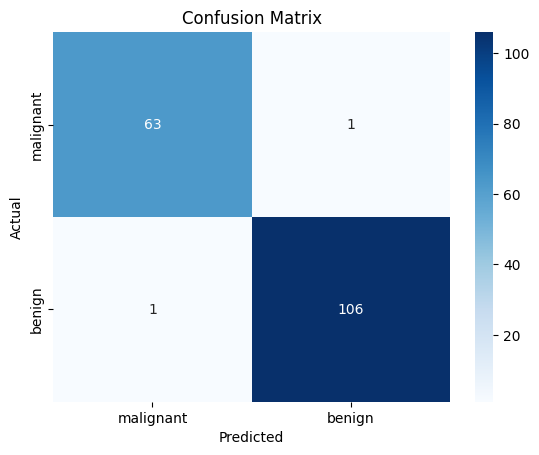


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [7]:
# --- 6. Evaluate the Model ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # for class 1
recall = recall_score(y_test, y_pred)       # for class 1
f1 = f1_score(y_test, y_pred)             # for class 1

print("\n--- Logistic Regression Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (for class 1 - benign): {precision:.4f}")
print(f"Recall (for class 1 - benign): {recall:.4f}")
print(f"F1-score (for class 1 - benign): {f1:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

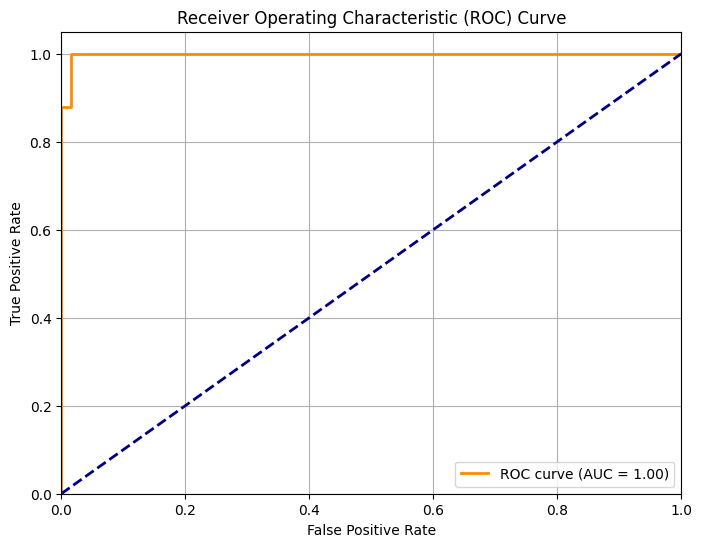

AUC: 0.9981


In [8]:
# --- 7. ROC Curve and AUC ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"AUC: {roc_auc:.4f}")


--- Effect of Regularization (C parameter) ---
C=0.001  | Accuracy on test: 0.9474 | Coef L2 norm: 0.2789
C=0.01   | Accuracy on test: 0.9591 | Coef L2 norm: 0.8090
C=0.1    | Accuracy on test: 0.9825 | Coef L2 norm: 1.7389
C=1      | Accuracy on test: 0.9883 | Coef L2 norm: 3.3871
C=10     | Accuracy on test: 0.9825 | Coef L2 norm: 8.3276
C=100    | Accuracy on test: 0.9532 | Coef L2 norm: 26.1781


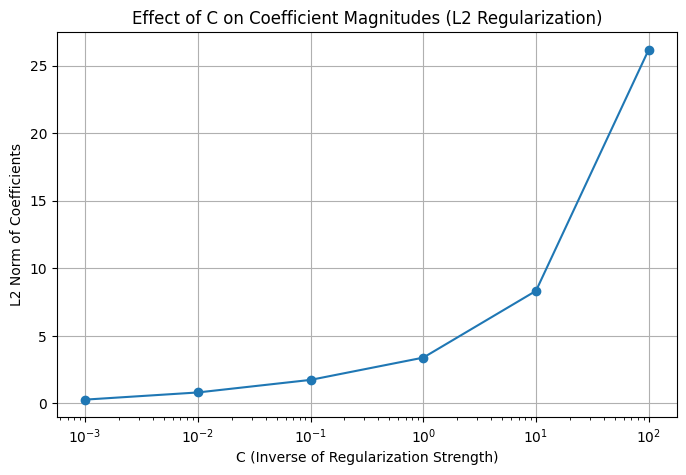

In [9]:
# --- 8. Effect of Regularization (changing C) ---
print("\n--- Effect of Regularization (C parameter) ---")
# C is the INVERSE of regularization strength. Smaller C = STRONGER regularization.
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
coef_magnitudes = []

for c_val in c_values:
    model_c = LogisticRegression(solver='liblinear', C=c_val, penalty='l2', random_state=42) # L2 penalty
    model_c.fit(X_train, y_train)
    # Calculate L2 norm of coefficients (excluding intercept for simplicity here if it were separate)
    coef_magnitudes.append(np.linalg.norm(model_c.coef_))
    print(f"C={c_val:<6} | Accuracy on test: {model_c.score(X_test, y_test):.4f} | Coef L2 norm: {coef_magnitudes[-1]:.4f}")

plt.figure(figsize=(8,5))
plt.plot(c_values, coef_magnitudes, marker='o')
plt.xscale('log')
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("L2 Norm of Coefficients")
plt.title("Effect of C on Coefficient Magnitudes (L2 Regularization)")
plt.grid(True)
plt.show()


In [11]:
# Example with L1 penalty for feature selection
print("\n--- Logistic Regression with L1 Penalty (Feature Selection) ---")
log_reg_l1 = LogisticRegression(solver='liblinear', penalty='l1', C=0.1, random_state=42) # Smaller C for stronger L1
log_reg_l1.fit(X_train, y_train)
num_zero_coefs_l1 = np.sum(log_reg_l1.coef_ == 0)
print(f"L1 Regularization (C=0.1):")
print(f"  Accuracy on test: {log_reg_l1.score(X_test, y_test):.4f}")
print(f"  Number of coefficients shrunk to zero: {num_zero_coefs_l1} out of {X_train.shape[1]}")
# print("Coefficients with L1 penalty:")
# for feature, coef in zip(feature_names, log_reg_l1.coef_[0]):
#     if abs(coef) > 1e-6: # Print non-zero coefficients
#         print(f"  {feature}: {coef:.4f}")


--- Logistic Regression with L1 Penalty (Feature Selection) ---
L1 Regularization (C=0.1):
  Accuracy on test: 0.9591
  Number of coefficients shrunk to zero: 23 out of 30


---
**Explanation of the Code:**

1.  **Load and Prepare Data:** We load the breast cancer dataset, split it, and apply `StandardScaler`.
2.  **Train Model:** `LogisticRegression` is instantiated. We use `solver='liblinear'` which is good for binary classification with smaller datasets and supports L1/L2 penalties. `C=1.0` is the default regularization strength.
3.  **Predictions:** `predict()` gives class labels, while `predict_proba()` gives the probabilities for each class (we take `[:, 1]` for the probability of class 1, which is 'benign').
4.  **Evaluation:** We use various classification metrics: accuracy, precision, recall, F1-score, confusion matrix, classification report, and ROC-AUC. These will be covered in more detail in Topic 5 (Model Evaluation), but they are essential for understanding classifier performance.
5.  **Effect of Regularization:** We loop through different values of `C` and observe how the L2 norm (magnitude) of the coefficients changes. Smaller `C` means stronger regularization, which typically leads to smaller coefficient magnitudes. We also show a quick example of L1 regularization to demonstrate feature selection.

Logistic Regression is a powerful and widely used classification algorithm due to its simplicity, interpretability, and good performance on a variety of problems, especially when the decision boundary is roughly linear.